In [16]:
from sympy import Matrix, symbols, transpose, zeros
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [41]:
C_mat = Matrix(2, 2, symbols("C_mat:4"))
A_mat = Matrix(2, 2, symbols("A_mat:4"))

delta_C_mat = Matrix(2, 2, symbols("delta_C_mat:4"))

x = Matrix([C_mat[i, j] for i in range(2) for j in range(2)])

delta_C_mat = A_mat * C_mat + C_mat * A_mat.T

dxdt = Matrix([delta_C_mat[i, j] for i in range(2) for j in range(2)])

A = dxdt.jacobian(x)

A


Matrix([
[2*A_mat0,          A_mat1,          A_mat1,        0],
[  A_mat2, A_mat0 + A_mat3,               0,   A_mat1],
[  A_mat2,               0, A_mat0 + A_mat3,   A_mat1],
[       0,          A_mat2,          A_mat2, 2*A_mat3]])

In [42]:

A.eigenvals()

{A_mat0 + A_mat3 - sqrt(A_mat0**2 - 2*A_mat0*A_mat3 + 4*A_mat1*A_mat2 + A_mat3**2): 1,
 A_mat0 + A_mat3 + sqrt(A_mat0**2 - 2*A_mat0*A_mat3 + 4*A_mat1*A_mat2 + A_mat3**2): 1,
 A_mat0 + A_mat3: 2}

Testing with actual values

In [43]:
C_mat = Matrix(2, 2, symbols("C_mat:4"))
#A_mat = Matrix([[1, 2], [3, 4]])
A_mat = np.random.randn(2,2)

delta_C_mat = Matrix(2, 2, symbols("delta_C_mat:4"))

x = Matrix([C_mat[i, j] for i in range(2) for j in range(2)])

delta_C_mat = A_mat * C_mat + C_mat * A_mat.T

dxdt = Matrix([delta_C_mat[i, j] for i in range(2) for j in range(2)])

A = dxdt.jacobian(x)

A

Matrix([
[ 1.98663953243175,  0.622525190182785,  0.622525190182785,                 0],
[-1.31911321610804, -0.524992208823382,                  0, 0.622525190182785],
[-1.31911321610804,                  0, -0.524992208823382, 0.622525190182785],
[                0,  -1.31911321610804,  -1.31911321610804, -3.03662395007852]])

In [44]:
A.eigenvals()

{-0.524992208823382: 1,
 1.21384912400695 + 1.51335610948047e-65*I: 1,
 -0.524992208823382 - 2.71838191339471e-65*I: 1,
 -2.26383354165371 - 1.41577061866853e-64*I: 1}

Checking 

/tmp/ipykernel_24097/1193102777.py:35: RuntimeWarning: invalid value encountered in log
  axs[1].plot(time_array, np.log(self.C_History[:, 0, 1]), label = "C01")


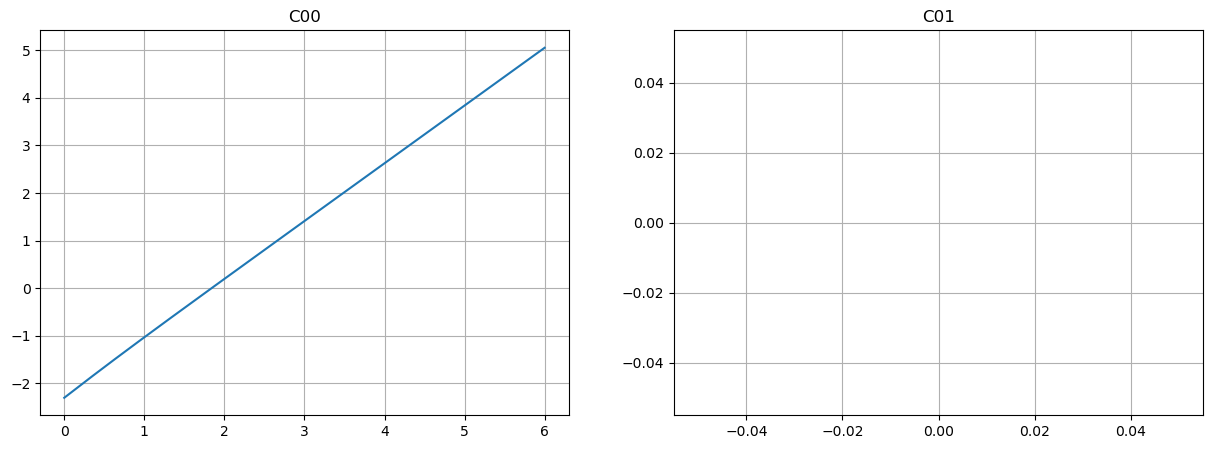

In [45]:
class SimpleSSD:
    def __init__(self, dt, total_time):

        
        self.dt = dt
        self.total_time = total_time
        self.num_steps = int(total_time / dt)
        
        self.C = np.array([[.1, -.01], [-0.1, .05]])
        self.C_History = np.zeros((self.num_steps, 2, 2))              
        self.C = self.C.astype(np.float64)

    def simulate(self):
        for i in range(self.num_steps):

            #self.A_U = np.array([[1,2],[3,4]]) 
            self.A_U = A_mat                
 
            C_dot = self.A_U @ self.C + self.C @ np.transpose(self.A_U)

            
            self.C += C_dot * self.dt

            self.C_History[i] = self.C

    def make_plots(self):

        time_array = np.arange(0, self.total_time, .001)
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))

       
        axs[0].plot(time_array, np.log(self.C_History[:, 0, 0]), label = "C00")
        axs[0].set_title(f"C00")
        axs[0].grid()
        axs[1].plot(time_array, np.log(self.C_History[:, 0, 1]), label = "C01")
        axs[1].set_title(f"C01")
        axs[1].grid()


        plt.show()


if __name__ == "__main__":
    ssd = SimpleSSD(dt = 0.001, total_time = 6)
    ssd.simulate()
    ssd.make_plots()

    

In [23]:
5 + np.sqrt(33)

10.744562646538029

In [46]:
np.log(ssd.C_History[5999, 0, 0]) - np.log(ssd.C_History[4999, 0, 0])

1.213126194625615